In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")
df = pd.read_csv('fortune500.csv')

In [2]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [3]:
df.tail()


,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


Head and tail helps us to discover how big is the dataset and what values are inside; next we need to name the columns and check with pandas, if some values are missing or if we got everything like we want to

In [4]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [5]:
len(df)

25500

In [6]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [7]:
non_numeric_profits = df.profit.str.contains('[^0-9.-]')

In [8]:
df.loc[non_numeric_profits].head()


,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [9]:
set(df.profit[non_numeric_profits])

{'N.A.'}

In [10]:
len(df.profit[non_numeric_profits])

369

In [11]:
companyNorton = df.company.str.contains('Norton')

In [12]:
companyNorton

0        False
1        False
2        False
3        False
4        False
         ...  
25495    False
25496    False
25497    False
25498    False
25499    False
Name: company, Length: 25500, dtype: bool

In [13]:
len(df.company[companyNorton])

66

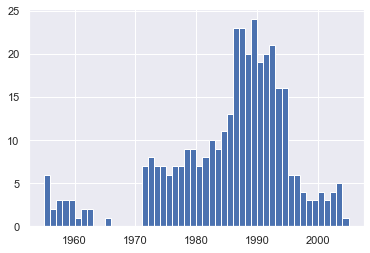

In [14]:
bin_sizes, _,_ = plt.hist(df.year[non_numeric_profits], bins=range(1955, 2006))

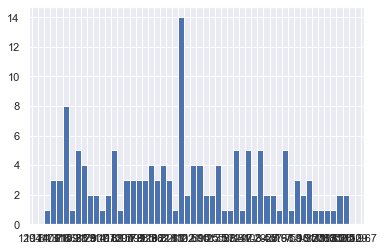

In [15]:
bin_sizes, _,_ = plt.hist(df.profit, bins=range(1955, 2006))

In [16]:
df = df.loc[~non_numeric_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [17]:
len(df)

25131

In [18]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [19]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x,y)
    ax.margins(x=0, y=0)